In [172]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
import copy

In [173]:
# Special packages
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.model_selection import train_test_split
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## **Q1. Read the data.**

_Read in the data from http://www.stat.ufl.edu/~winner/data/clinton1.dat. Note that this is NOT a CSV file. The description of the data fields are present in http://www.stat.ufl.edu/~winner/data/clinton1.txt. You will have  to  figure  out  the  rightparameters for thereadcsvcommand yourself (e.g., the regular expressionfor the delimiter, and the names of the columns)._

In [141]:
df = pd.read_table('http://users.stat.ufl.edu/~winner/data/clinton1.dat',
                    header = None,
                    names = ['County_Name',
                            'percentVoting',
                            'Median_Age',
                            'Mean_Savings',
                            'Per_Capita_Income',
                            'Percent_Poverty',
                            'Percent_Veterans',
                            'Percent_Female',
                            'Population_Density',
                            'Percent_Nursing_Homes',
                            'Crime_Index'],
                   sep = '\s{2,}',
                   index_col = 0)

C:\Users\jeile\Anaconda3\envs\chakra\lib\site-packages\ipykernel_launcher.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


In [142]:
df[:10]

,percentVoting,Median_Age,Mean_Savings,Per_Capita_Income,Percent_Poverty,Percent_Veterans,Percent_Female,Population_Density,Percent_Nursing_Homes,Crime_Index
County_Name,,,,,,,,,,
"Autauga, AL",30.92,31.7,57623,15768,15.2,10.74,51.41,60.4,2.36,457
"Baldwin, AL",26.24,35.5,84935,16954,13.6,9.73,51.34,66.5,5.40,282
"Barbour, AL",46.36,32.8,83656,15532,25.0,8.82,53.03,28.8,7.02,47
"Blount, AL",32.92,34.5,61249,14820,15.0,9.67,51.15,62.4,2.36,185
"Bullock, AL",67.67,31.7,75725,11120,33.0,7.08,50.76,17.6,2.91,141
"Butler, AL",47.43,33.5,75887,12015,27.1,9.48,53.25,28.1,7.98,266
"Calhoun, AL",38.44,32.7,76073,15162,18.0,11.95,51.66,190.8,4.81,560
"Chambers, AL",45.36,34.8,40498,13887,18.8,10.52,52.77,62.1,6.15,218
"Cherokee, AL",53.61,36.3,56386,13936,15.4,9.29,50.82,35.8,5.61,51


## **Q2. Predict percentVoting on all regressors**

_Create matrices for X and y values. Use an OLS regression. Find the 2 highest p-values._

In [143]:
y, X = dmatrices('percentVoting ~ Median_Age + Mean_Savings + Per_Capita_Income + Percent_Poverty + Percent_Veterans + Percent_Female + Population_Density + Percent_Nursing_Homes + Crime_Index', data=df, return_type='dataframe')

In [144]:
model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          percentVoting   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     145.4
Date:                Fri, 13 Apr 2018   Prob (F-statistic):          4.12e-224
Time:                        15:02:07   Log-Likelihood:                -9576.0
No. Observations:                2704   AIC:                         1.917e+04
Df Residuals:                    2694   BIC:                         1.923e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -38.3094      5.818     -6.585      0.000     -49.717     -26.901
Median_Age                0.0707      0.060      1.179      0.239      -0.047       0.188
Mean_Savings          -3.077e-05   4.93e-06     -6.247      0.000   -4.04e-05   -2.11e-05
Per_Capita_Income         0.0002   7.42e-05      2.375      0.018    3.08e-05       0.000
Percent_Poverty           0.7669      0.035     22.118      0.000       0.699       0.835
Percent_Veterans          0.3088      0.087      3.554      0.000       0.138       0.479
Percent_Female            1.1844      0.119      9.985      0.000       0.952       1.417
Population_Density        0.0019      0.000      9.681      0.000       0.002       0.002
Percent_Nursing_Homes    -0.0908      0.033     -2.794      0.005      -0.155      -0.027
Crime_Index              -0.0013      0.001     -1.469      0.142      -0.003       0.000
==============================================================================
Omnibus:                       22.560   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.526
Skew:                           0.129   Prob(JB):                     6.39e-07
Kurtosis:                       3.432   Cond. No.                     3.62e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [145]:
result.pvalues.sort_values(ascending = False)[:2]

Median_Age     0.238619
Crime_Index    0.141950
dtype: float64

## **Q3. A formula-creating function**

_Join list of regressors into a string formatted like the first argument for dmatrices_

In [146]:
def formula(regressors):
    y_var = 'percentVoting'
    x_var = ' + '.join(regressors)
    return y_var + " ~ " + x_var

In [147]:
formula(['age', 'savings', 'income'])

'percentVoting ~ age + savings + income'

## **Q4. R-squared computation function**

_Uses the formula to run an OLS regression on stated regressors and return R-squared value_

In [148]:
def rsquared(regressors):
    f = formula(regressors)
    y, X = dmatrices(f, data=df, return_type='dataframe')
    model = sm.OLS(y, X)
    result = model.fit()
    return result.rsquared

In [149]:
rsquared(['Median_Age','Mean_Savings','Per_Capita_Income','Percent_Poverty'])

0.27117765549214656

## **Q5. Find the next best regressor**

_Uses a list of given regressors. Tracks maximum rsqs and regressors. Compares current regressor list with list of all other regressors. Calculates rsqs for each of non-given regressors and returns tuple of regressor with highest R-squared value._

In [150]:
def best_next_regressor(current_regressor_list, all_regressors_list):
    max_rsq = 0
    max_regressor = ''
    
    for regressor in all_regressors_list:
        if regressor in current_regressor_list:
            continue
            
        l = copy.deepcopy(current_regressor_list)
        l.append(regressor)
        rsq = rsquared(l)
        
        if rsq > max_rsq:
            max_rsq = rsq
            max_regressor = regressor
    
    return max_regressor, max_rsq
        

In [151]:
all_regressors = list(df)[1:]
current_regressors = ['Median_Age', 'Mean_Savings', 'Percent_Poverty']
x = best_next_regressor(current_regressor_list=current_regressors, all_regressors_list=all_regressors)
x

('Population_Density', 0.2940949050174445)

In [152]:
y = best_next_regressor([], all_regressors)
y  # the single best individual regressor

('Percent_Poverty', 0.2510385196163204)

## **Q6. Pick the _k_ best next regressors**

_Make lists to contain regressors and R-squareds. Uses the best next regressors function to find each next-highest regressor and its r-squared value and add them to their respective lists. Returns a tuple of the regressor and R-squared lists._

In [153]:
# The question statement was vague about whether or not we pass in a list of current regressors
# as a parameter to use for best_next_regressor. Therefore, I included it as an "optional" parameter
# with a default value that assumes current_regressors_list is []

def best_regressors(num_regressors, all_regressors_list, current_regressor_list=[]):
    regressors = []
    rsqs = []
    use_list = copy.deepcopy(all_regressors_list)
    
    for i in range(num_regressors):
        max_regressor, rsq = best_next_regressor(current_regressor_list, use_list)
        
        regressors.append(max_regressor)
        rsqs.append(rsq)
        use_list.remove(max_regressor)
        
    return regressors, rsqs

In [154]:
best_regressors(4, all_regressors)

(['Percent_Poverty',
  'Percent_Female',
  'Per_Capita_Income',
  'Population_Density'],
 [0.2510385196163204,
  0.07225274313389196,
  0.05045877139552979,
  0.03404175013622768])

In [155]:
best_regressors(4, all_regressors, current_regressor_list=['Percent_Poverty', 'Population_Density'])

(['Percent_Female',
  'Mean_Savings',
  'Percent_Nursing_Homes',
  'Percent_Veterans'],
 [0.30914506632485783,
  0.29027454201038905,
  0.2877891518418999,
  0.2877086709828366])

## **Q7. Order all regressors in the best order**

_Loops through a list of all regressors. While the list isn't empty, finds the next best regressor and appends it to a list of current regressors. In the next iteration, finds the next best regressor taking into account current regressors, and appends that to the list of current regressors, until all regressor list is empty_

In [156]:
current_regressors = []
rsqs = []
all_regressors = list(df)[1:]

while all_regressors != []:
    regressor, rsq = best_regressors(1, all_regressors, current_regressor_list=current_regressors)
    current_regressors.append(regressor[0])
    rsqs.append(rsq[0])
    print regressor[0] + "    " + str(rsq[0])
    all_regressors.remove(regressor[0])

Percent_Poverty    0.2510385196163204
Population_Density    0.2858298022910576
Percent_Female    0.30914506632485783
Mean_Savings    0.3192411850237048
Percent_Veterans    0.32299256887291705
Percent_Nursing_Homes    0.3248512713869368
Per_Capita_Income    0.3258249238995897
Crime_Index    0.3265532557049271
Median_Age    0.3269003872517413


## **Q8. Plot the R-squared values as regressors are added in the best order.**

_We kept track of a list of regressors and R-squareds in the previous problem, so we use them to create a series and plot the series._

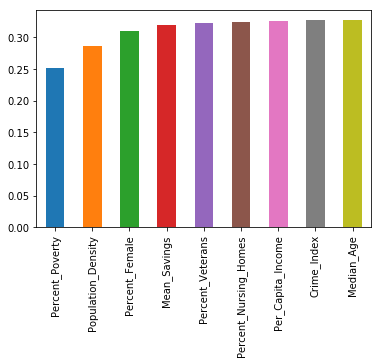

In [157]:
dictionary = dict(zip(current_regressors, rsqs))
s = Series(dictionary)
s.sort_values().plot(kind='bar')

## **Q9. Create  a  classification  target.**

_Attach a new column, called target to the DataFrame, whose value for each row is either 1 (if percentVoting is at least 40.0), or 0 (percentVoting is less than 40.0)_

_Approach: create 'target' in the entire DataFrame intially as 0, and change the values to 1 where percentVoting >= 40.0_

In [174]:
df['target'] = 0
mask = df['percentVoting'] >= 40.0
df['target'][mask] = 1

C:\Users\jeile\Anaconda3\envs\chakra\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## **Q10. Create  training  and  test  sets.**

_Create design matrices for predicting the target using just the two features poverty and population density. Split this into design matrices for training and testing datasets, with 70% of the data being used for training, and 30% for testing._

_Approach: create a subset of df using .copy() to use dmatrices to create the training and test sets using train-test-split_

In [175]:
df_copy = df[['Percent_Poverty','Population_Density','target']].copy()

y, X = dmatrices('target ~ 0 + Percent_Poverty + Population_Density',
                df_copy, return_type = 'dataframe')

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=1)

## **Q11. Accuracy of classification.**

_Use a K-nearest neighbors classifier to predict the target using the two given features, using 1,3,5,10,20,50,100,and 1000 nearest neighbors respectively. Print out the training and test accuracy for each of these._

_Approach: create a list called models in order to loop through each number of nearest neighbors. For every model, print the accuracy on Training and Test data._

In [177]:
from sklearn import neighbors
from sklearn import metrics

models =[]
k = [1,3,5,10,20,50,100,1000]

for i in k:
    model = neighbors.KNeighborsClassifier(n_neighbors = i, weights='uniform', p=2)
    models.append(model)

In [178]:
for m in models:
    m.fit(X_train, y_train)
    prediction_on_training = m.predict(X_train)
    print("Number of nearest neighbors: " + str(m.n_neighbors))
    print( "Training Data Accuracy: " +  str(metrics.accuracy_score(y_train, prediction_on_training)))
    prediction_on_test = m.predict(X_test)
    print( "Test Data Accuracy: " +  str(metrics.accuracy_score(y_test, prediction_on_test)))
    print

C:\Users\jeile\Anaconda3\envs\chakra\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Number of nearest neighbors: 1
Training Data Accuracy: 0.9978858350951374
Test Data Accuracy: 0.6009852216748769

Number of nearest neighbors: 3
Training Data Accuracy: 0.7880549682875264
Test Data Accuracy: 0.6354679802955665

Number of nearest neighbors: 5
Training Data Accuracy: 0.7484143763213531
Test Data Accuracy: 0.6305418719211823

Number of nearest neighbors: 10
Training Data Accuracy: 0.7204016913319239
Test Data Accuracy: 0.646551724137931

Number of nearest neighbors: 20
Training Data Accuracy: 0.6902748414376322
Test Data Accuracy: 0.6588669950738916

Number of nearest neighbors: 50
Training Data Accuracy: 0.6839323467230444
Test Data Accuracy: 0.6625615763546798

Number of nearest neighbors: 100
Training Data Accuracy: 0.6775898520084567
Test Data Accuracy: 0.6637931034482759

Number of nearest neighbors: 1000
Training Data Accuracy: 0.5671247357293869
Test Data Accuracy: 0.5763546798029556



## **Q12. Plots and reasons.**

_Show a scatter plot of population density versus poverty, and color the points according to the target (i.e., each point
in the scatter plot represents a county, and the color of the county depends on the value of target for that county). Can you interpret the plot? What types of counties voted for Bill Clinton?_

_Approach: self-explanatory, zoomed in on scatterplot using xlim to truncate the outliers (for example, 'Kings, NY')_

(0, 5000)

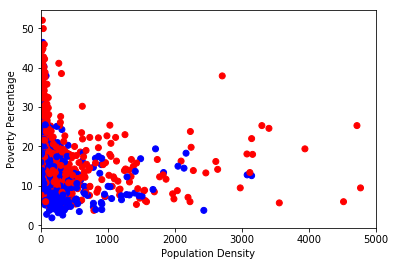

In [179]:
y = y['target'].values
sc = scatter(X['Population_Density'], X['Percent_Poverty'], c=y, cmap='bwr')
xlabel('Population Density')
ylabel('Poverty Percentage')
xlim(0,5000)

As both population density and poverty percentage increase, a county is more likely to have cast more than 40% of their votes for Clinton. Thus, the counties that voted for Clinton had high levels of poverty and were more dense, suggesting that they were urban. At lower levels of population density, counties with a higher poverty percentage favored Clinton. 